In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
# data = pd.read_csv("../../data/bikes_rent.csv")
data = pd.read_csv('https://github.com/Yorko/mlcourse.ai/raw/main/data/bikes_rent.csv')

In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


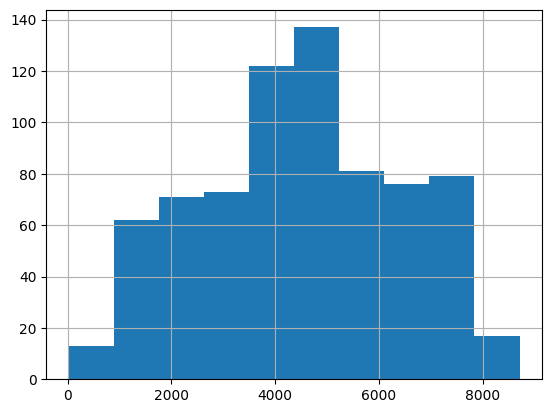

In [5]:
data["cnt"].hist();

In [6]:
X_df, y_series = data.drop("cnt", axis=1), data["cnt"]

In [7]:
X_df.shape

(731, 12)

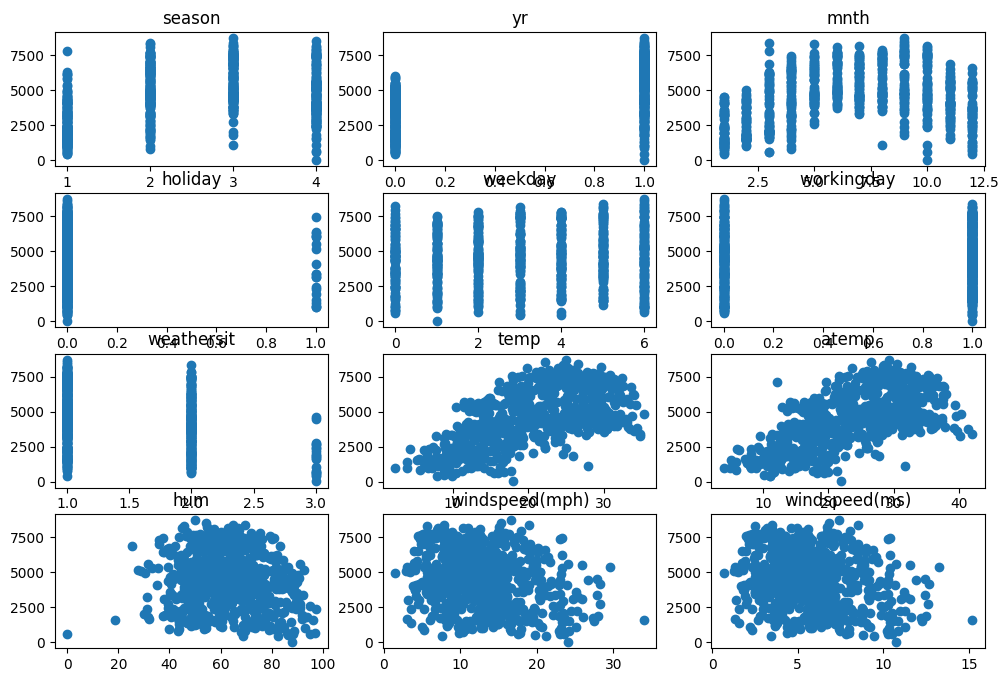

In [8]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

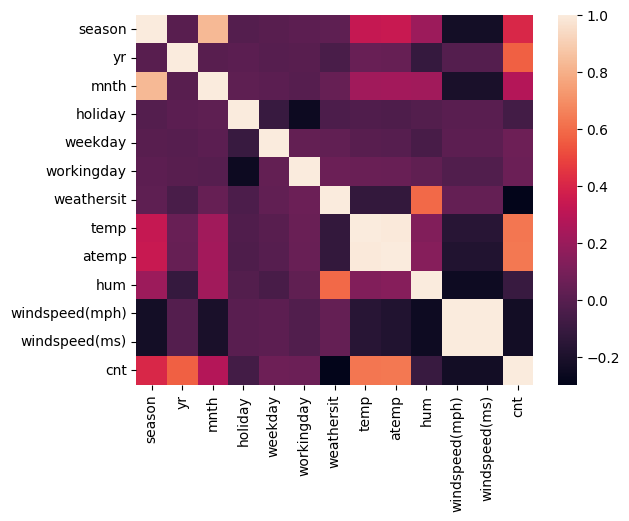

In [9]:
sns.heatmap(data.corr());

In [10]:
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV

In [12]:
# ols = LinearRegression(normalize=True)
ols = LinearRegression()

In [13]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
ols.fit(X_train, y_train)

LinearRegression()

In [16]:
y_ols_pred = ols.predict(X_valid)

In [17]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [18]:
def beatiful_coef(coefs, feature_names=X_df.columns):
    return pd.DataFrame(coefs, index=feature_names, columns=["coef"]).sort_values(
        "coef", ascending=False
    )

In [19]:
rmse(y_valid, y_ols_pred)

1121.7956188306473

In [20]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
windspeed(ms),1.299086e+12
yr,2.111925e+03
season,3.737373e+02
atemp,1.113779e+02
weekday,5.185567e+01
workingday,3.170111e+01
mnth,9.011628e+00
temp,8.536889e+00
hum,-1.043754e+01
holiday,-4.139650e+02


In [26]:
# ridge = Ridge(random_state=17, normalize=True)
ridge = Ridge(random_state=17)

In [27]:
ridge.fit(X_train, y_train)

Ridge(random_state=17)

In [28]:
beatiful_coef(ridge.coef_)

,coef
yr,2085.779799
season,369.293546
atemp,113.601210
weekday,51.817212
workingday,34.182260
mnth,8.323890
temp,6.313582
hum,-10.645012
windspeed(ms),-13.392387
windspeed(mph),-29.958770


In [29]:
ridge_valid_pred = ridge.predict(X_valid)

In [30]:
rmse(y_valid, ridge_valid_pred)

1119.62963109031

In [31]:
alphas = np.logspace(-4, 4, 100)

In [33]:
# ridge_cv = RidgeCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

In [34]:
ridge_cv.alpha_

0.1176811952434999

In [35]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [36]:
rmse(y_valid, best_ridge_valid_pred)

1120.703079042399

In [37]:
# lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)
lasso = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+08, tolerance: 1.283e+05
  model = cd_fast.enet_coordinate_descent(


In [38]:
lasso.alpha_

0.0001

In [39]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [40]:
rmse(y_valid, best_lasso_valid_pred)

1120.8673042738158

In [41]:
beatiful_coef(lasso.coef_)

,coef
yr,2112.942412
season,372.938814
atemp,110.409645
weekday,51.752013
workingday,32.214447
temp,9.607637
mnth,9.094458
windspeed(ms),-0.000000
hum,-10.448079
windspeed(mph),-35.846408


In [42]:
beatiful_coef(ridge_cv.coef_)

,coef
yr,2109.666435
season,372.518771
atemp,110.967608
weekday,51.761715
workingday,32.463280
temp,9.021391
mnth,8.995627
hum,-10.472142
windspeed(ms),-13.357641
windspeed(mph),-29.881044


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)

In [45]:
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [46]:
forest_valid_pred = forest.predict(X_valid)

In [47]:
rmse(y_valid, forest_valid_pred)

1053.805724969352

In [48]:
beatiful_coef(forest.feature_importances_)

,coef
temp,0.324132
atemp,0.216861
yr,0.200795
hum,0.067893
season,0.064054
weathersit,0.032349
mnth,0.028291
windspeed(ms),0.020298
weekday,0.018796
windspeed(mph),0.017695
